# Introducción

En esta libreta usaremos la librería de Keras para construír modelos para problemas de clasificación. Para este proyecto, usaremos el conjunto de datos MNIST, el cual es un dataset bastante usado y contiene varias imágenes con números escritos a mano.

El **MNIST Dataset**, siglas de Modified National Institute of Standards and Technology, es un conjunto de datos grande con dígitos escritos a mano usado comúnmente para entrenar sistemas de entrenamiento de procesamiento de imágenes. Este conjunto de datos es ampliamente usado para el entrenamiento y testeo en el campo de machine learning y deep learning.

El MNIST Dataset contiene 60,000 imagenes de entrenamiento y 10,000 imágenes de dígitos escritos a mano por estudiantes de preparatoria y empleados del United States Census Bureau.


# Modelo de Clasificación FCN

## Importando librería Keras y sus paquetes

Empecemos importando Keras y algunos de sus módulos.

In [1]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

2023-06-07 17:25:57.409694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Como estamos tratando con imágenes, importamos también Matplotlib con el fin de poder verlas.

In [2]:
import matplotlib.pyplot as plt

El conjunto de datos del MNIST, al ser ampliamente usado, como se vio anteriormente, forma parte del API de la librería de Keras. 

A continuación, importaremos, el MNIST dataset de la librería de Keras. Convenientemente, el dataset viene dividido en un conjunto de datos de entrenamiento y de pruebas.

In [3]:
# importar el dataset
from keras.datasets import mnist

# leer el dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


El valor de `X` son las imágenes como tal, mientras que las `y` son las etiquetas asociadas a cada imagen.

Podemos ver el número de imágenes para cada conjunto. De acuerdo a la documentación, deberíamos de tener 60,000 imágenes en `X_train` y 10,000 imágenes en `X_test`

In [4]:
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')

X_train.shape=(60000, 28, 28)
X_test.shape=(10000, 28, 28)


Como podemos apreciar, el primer número en la tupla es el número de imágenes, mientras que los otros dos números son el tamaño de la imagen en el dataset. Por lo tanto, cada imagen es de 28 x 28 pixeles.

Podemos visualizarlo usando Matplotlib:

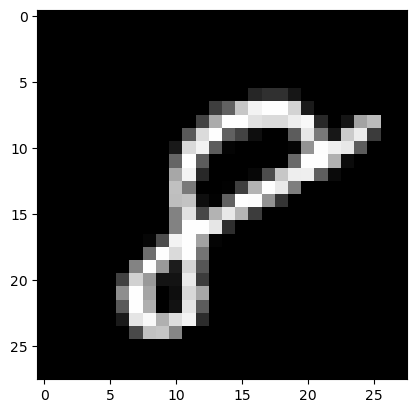

In [5]:
plt.imshow(X_train[-1], cmap='gray')

Si intentamos "ver" la imagen imprimiendo sus valores, el resultado será un `numpy.ndarray` con valores que van de **0** (totalmente negro) a **255** (totalmente blanco)

In [27]:
X_train[-1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Como primero vamos a trabajar con una red neuronal FCN (**Fully-Connected Network**), siendo una red neuronal "convencional", no podemos meter la imagen como entrada asi tal cual. Por lo tanto, tenemos que hacer un preprocesamiento de la imagen para *aplanar* las imágenes, convirtiéndolas en vectores uni-dimensionales de tamaño `1 x (28 x 28) = 1 x 784.`

In [7]:
# aplanando las imágenes en vectores uni-dimensionales

num_pixeles = X_train.shape[1] * X_train.shape[2] # 28 x 28 <- encontrando el tamaño del vector 1D

X_train = X_train.reshape(X_train.shape[0], num_pixeles) # aplanando conjunto de entrenamiento
X_test = X_test.reshape(X_test.shape[0], num_pixeles) # aplanando conjunto de pruebas

Dado que los valores de los píxeles pueden oscilar entre 0 y 255, normalicemos los vectores para que estén entre 0 y 1.

In [8]:
# normalicemos inputs de 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

Antes de construir el modelo de red neurnal, recordemos que debemos de separar nuestra target variable en categorias. Por esta razón, usamos la función to_categorical importada de las utilidades de Keras.

In [9]:
# hacemos un one-hot encoding para los outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [11]:
num_clases = y_test.shape[1]
print(num_clases)

10


## Construyendo la Red Neuronal

In [12]:
# Definiendo un modelo de clasificacion
def classification_model():
    # creando el modelo
    model = Sequential()
    model.add(Dense(num_pixeles, activation='relu', input_shape=(num_pixeles,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_clases, activation='softmax'))
    
    
    # compilando el modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Entrenamiento y Pruebas de la Red Neuronal

In [13]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10


2023-06-07 17:27:03.899065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 6s 3ms/step - loss: 0.1858 - accuracy: 0.9445 - val_loss: 0.0980 - val_accuracy: 0.9686
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0781 - accuracy: 0.9760 - val_loss: 0.0757 - val_accuracy: 0.9769
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0533 - accuracy: 0.9829 - val_loss: 0.1087 - val_accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0685 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.0672 - val_accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0757 - val_accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.1039 - val_accuracy: 0.9777


Ahora imprimemos el accuracy (precisión) y el error.

In [80]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.9801999926567078% 
 Error: 0.019800007343292236


In [150]:
from PIL import Image
import matplotlib.image as mpimg

test_img_path = './img/testing/num_6-1.png'

test_img = Image.open(test_img_path).convert('L')
test_img.save('./img/testing/greyscale.png')

test_img_path = './img/testing/greyscale.png'

In [151]:
print(test_img_path)
img = mpimg.imread(test_img_path,)

./img/testing/greyscale.png


1/1 [==============================] - 0s 16ms/step


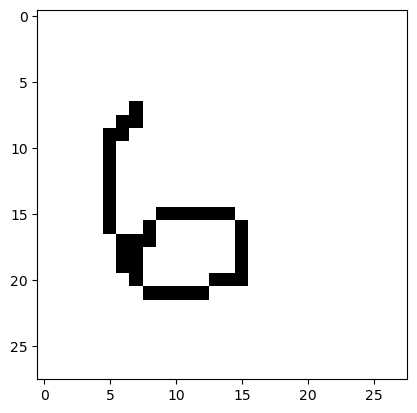

In [152]:
plt.imshow(img,cmap='Greys')
pred = model.predict(img.reshape(1,num_pixeles))

In [153]:
pred.argmax()

6